In [116]:
# libraries to describe de data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk # imports the natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer 
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime
from PIL import Image
from nltk.probability import FreqDist

plt.style.use('ggplot')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gustavovergara238/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gustavovergara238/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [117]:
df_tweets = pd.read_csv('data/2019.csv') # read the csv file

In [118]:
df_tweets.shape # shows the number of rows and columns

(17698, 9)

In [119]:
df_tweets.info() # shows the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17698 entries, 0 to 17697
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   full_text        17698 non-null  object
 1   user             17698 non-null  object
 2   location         17698 non-null  object
 3   date             17698 non-null  object
 4   tweet_id         17698 non-null  int64 
 5   number_rt        17698 non-null  int64 
 6   number_likes     17698 non-null  int64 
 7   number_reply     17698 non-null  int64 
 8   conversation_id  17698 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


In [120]:
df_tweets.describe() # shows the mean, std, min, max, etc. of each column

,tweet_id,number_rt,number_likes,number_reply,conversation_id
count,1.769800e+04,17698.000000,17698.000000,17698.000000,1.769800e+04
mean,1.147017e+18,2.145101,7.685614,0.606848,1.146736e+18
std,3.824295e+16,25.705813,97.046305,7.947419,3.908216e+16
min,1.083115e+18,0.000000,0.000000,0.000000,6.265645e+17
25%,1.111778e+18,0.000000,0.000000,0.000000,1.111776e+18
50%,1.145119e+18,0.000000,0.000000,0.000000,1.145118e+18
75%,1.178459e+18,0.000000,2.000000,0.000000,1.178457e+18
max,1.244776e+18,1650.000000,6946.000000,794.000000,1.244776e+18


In [121]:
df_tweets['full_text'].str.len().describe()

count    17698.000000
mean       142.696293
std         79.503198
min          7.000000
25%         77.000000
50%        126.000000
75%        208.000000
max        689.000000
Name: full_text, dtype: float64

En cuanto a la longitud del texto del tweet medida en carácteres, encontramos un promedio de 143 carácteres, un máximo de 689 carácteres y un mínimo de 7 carácteres.

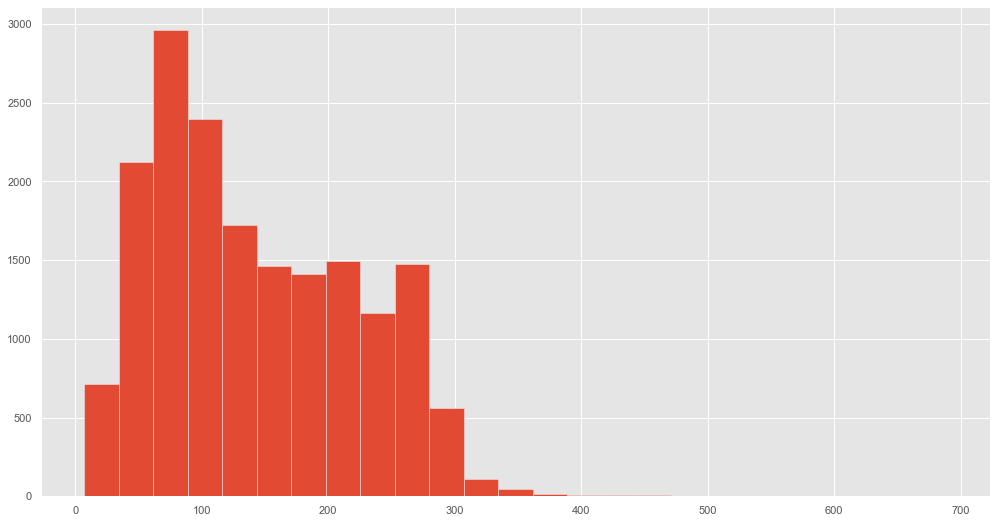

In [122]:
df_tweets['full_text'].str.len().mean() # shows the average length of the tweets
plt.hist(df_tweets['full_text'].str.len(),bins=25); # shows the histogram of the length of the tweets


De acuerdo a la gráfica anterior, podemos encontrar que la distribución es sesgada a la derecha. Hay temas más sensibles o controversiales que requieren una mayor extensión de carácteres. Para ello, pasamos a analizar las palabras dentro del tweet.

In [123]:
df_tweets['full_text'].str.split().str.len().describe()

count    17698.000000
mean        21.930105
std         12.619929
min          1.000000
25%         12.000000
50%         19.000000
75%         31.000000
max         75.000000
Name: full_text, dtype: float64

En cuanto a la longitud del texto del tweet medida en palabras, encontramos un promedio de 22 palabras, un máximo de 75 palabras y un mínimo de 1 palabra. 

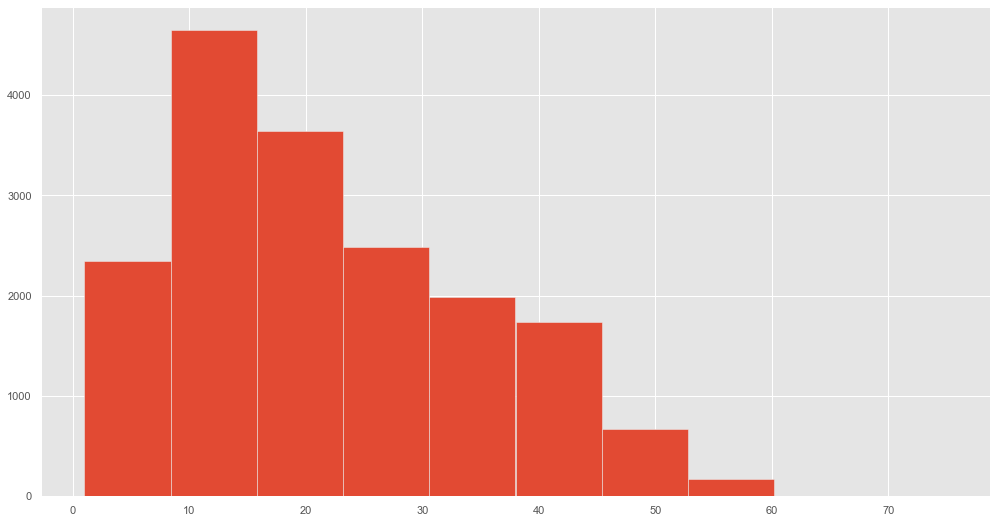

In [124]:
plt.hist(df_tweets['full_text'].str.split().str.len()); # shows the histogram of the length of the words in the tweets

Observamos el mismo comportamiento cuando vemos la distribción en cuanto palabras. Procederemos a revisar los tweets que contienen el mínimo y el máximo de palabras.

In [125]:
data=df_tweets.copy() # copy the dataframe
data['num_words']=df_tweets['full_text'].str.split().str.len() # create a new column with the number of words in each tweet
data['num_char']=df_tweets['full_text'].str.len() # create a new column with the number of characters in each tweet

In [126]:
data['num_words'].value_counts().reset_index().sort_values(by='index',ascending=False) # shows the number of words in each tweet

,index,num_words
64,75,1
63,69,1
65,67,1
62,65,1
59,62,3
...,...,...
24,5,323
31,4,277
42,3,163
46,2,123


In [127]:
data[['full_text','num_words']][data['num_words']==73]

,full_text,num_words


In [128]:
data[['full_text','num_words']][data['num_words']<=2].sort_values(by='num_words').sample(10) # shows the tweets with 75 words or 1 word

,full_text,num_words
13598,@yerbomatofono Medellín,2
6338,@adan_medellin Ajajajajajaja.,2
271,Medellín,1
3788,@ojitosgp Medellín,2
14201,@JoseCuelloB Medellín.,2
8072,MUNDOPARLANTE MEDELLIN,2
5381,Medellín*,1
10308,Medellín!!!! 😘,2
5104,Medellín cumplió.,2
8654,Medellin próximamente,2


Podemos observar como los tweets con menor cantidad de palabras (2 o menos), la palabra "Medellín" es la más recurrente. Esto debido a que es nuestro principal tema de búsqueda. En el caso de los tweets con exactamente dos palabras, "Medellín" aparece acompañado de una mención, un emoticón, un año, entre otras.

In [129]:
data.loc[8374,'full_text'] # shows the tweet with the index 8374

' @Alex881490101 @Ceballitos1 @ramirezdo @Angeljosew1 @RadicalEd @lilipiedadvalle @LAPacifiKA @LeilaChujfi @SerHRodriguez @ANNALVAREZG @MiremosaVer @juancadelgado @gener_usuga @MonoMeLlaman @edywfernandez @JAtecor @merv59 @JUANCAELBROKY @ClavijoAndres83 @Marianiniecheve @JohaFuentes @gurozu @MauricioGalin11 @LaMamert4 @DIDASKALOSW @InTweetiva @lbertoortiz @mauronuma @DanielSamperO @Julianaramirez6 @AlvaroUribeVel Esos uribeños que reciclan todo lo que dice su amo me hacen reír mucho. Es como hablar con un lorito. «Angelito quiere cacao» jajajajajaja Debería seguir lavando baños y no perder el tiempo defendiendo a un narcoterrorista excartel de Medellín. Un abrazo a todos!'

In [130]:
list=[65,67,69,75]
data2=data[['full_text','num_words']][(data['num_words']).isin(list)].sort_values(by='num_words') # shows the tweets with the words 65, 67, 69

In [131]:
print(data2.iloc[0,0],"\n"+"-"*20,data2.iloc[1,0],"\n"+"-"*20,data2.iloc[2,0],"\n"+"-"*20,data2.iloc[3,0])

 @baloncentralofi @MillosDColombia @MillonariosEste @acordellat @AficionColombia @CuyigansPasto @ConRola @Elyorkalvarez @nixoncarranza Así quedan los 8, el Once tiene buena diferencia de gol y el 9, 10 y 11 tienen partidos muy duros, difícil que sumen los 6, inclusive si esos 3 pierden entre semana ya quedan definidos los 8, a Medellín le tocaría ganar los dos partidos y esperar que el Once no sume en Sta Marta. 
--------------------  @transmetrobaq @UTSistur @pabvic1 @AMBQuilla @Metrocaribe @OperadorUno1 @luchovoltios @SOBUSA_SA @AtlanticoEmi @jorgecura1070 @CaracolBquilla @HENRYFOREROJ @ExtraNoticiasCo Ajá que culpa tengo yo sí así es la historia del metro Medellín. Aún así si fuera como me dices, digamos q sostiene, porque los metros q tienen más de 20 años y los metroplus q tienen casi la misma edad q los de bquilla, los de TM se ven acabados? Responda! Y estaciones 
--------------------  @HerliRodriguez2 @CarrillonavasG @indignada2016 @patriciam265 @paula30202449 @Setulus1 @Malupr

Al ver los textos con mayor extensión de palabras, destacamos dos puntos: 
1. El gran uso de menciones usando el arroba extiende la longitud del tweet y no aportaría información relevante para el análisis de sentimientos por lo que la eliminación podría considerarse.
2. Algo a tener en cuenta al incluir Medellín en el texto del tweet es que este puede no solo referirse a la ciudad, si no también al equipo de futbol "Deportivo Independiente Medellín" por lo que hay que saber diferenciar esto si queremos sacar conclusiones.
3. Los tweets con menor cantidad de palabras asocian su texto con la palabra "Medellín" acompañada de algo más, esto por si solo no sería relevante para nuestro análisis por lo cual se le podría dar un tratamiento especial. 

## Preprocesamiento del texto

In [132]:
# import extra code that will help us in our process
import tools 
# import shape for our word cloud
#char_mask = np.array(Image.open('/content/circulo.png'))

In [133]:
# figure size in inches
sns.set(rc={'figure.figsize':(17,9)})

In [134]:
def twitter_to_words(df, column, stop_words,replace_punctuation_dict,replace_accent_dict):
  """
  clean de data to plot a word cloud with only the relevant information
  """
  wwpawsw = [] #Words_Without_Punctuation_And_Without_Stop_Words

  # creating a list with all the words inside all the tweets
  for tweet in df_tweets[column]:
    words = tweet.split()

    # remove punctuation marks
    for w in words:
      wl = w.lower() # word in lower case
      # replace some punctuations mark to keep only words
      for punctuation, new_value in replace_punctuation_dict.items():
        wl = wl.replace(punctuation,new_value)
      
      if wl.isalpha(): # skip if the word contains punctuation mark 

        # replace accent mark 
        for accent, new_value in replace_accent_dict.items():
          wl = wl.replace(accent,new_value)

        if wl not in stop_words: # filtering by stop words
          wwpawsw.append(wl)
  
  return wwpawsw

In [135]:
# function to plot th word cloud

def plot_word_cloud(char_mask, word_fre):
  # generating the wordcloud
  wordcloud = WordCloud(background_color='white',
                        mask=char_mask,
                        max_words=50).generate_from_frequencies(word_fre)
  # plot the word cloud 
  plt.figure(figsize=(15,15))
  plt.imshow(wordcloud)

  #to remove axis value
  plt.axis('off')
  plt.show()

In [136]:
tweet_text=df_tweets['full_text']
sample_text=tweet_text.sample(n=10,random_state=10)
for text in sample_text:
  print(text,"\n")


 Por otro lado La Policía hizo allanamientos en Bogotá, Medellín y Cali a viviendas de personas que hacen parte de movimientos que promueven el #ParoNacional21Nov "En estos allanamientos las autoridades se llevaron pinceles, pinturas y carteles alusivos al paro." 

 CASA EN BELÉN LA GLORIA SOBRE LA AVENIDA 80 en Medellín/Antioquia/Colombia en Venta 

 @matyakdmia @CynDLQ Club Colombia perro. Y el Ron Medellín que tomó hasta @Nahuerc 

 @kenroVlogs Hermoso corazon saludos desde medellin colombia 

 Carechimba, EMPEZÓ A LLOVER JUSTO CUANDO TENGO QUE IR A CLASE, O SEA, NO, MEDELLÍN, ME TENÉS MAMADA MARICA 

 @Der0207 @IamCabezoon Junior le ofreció más q Medellín, lo dijeron en win, pero el burro este solo juega en su dim 

 El aire más enrarecido, el cielo cada vez más gris y unas congestiones insoportables en las vías. La medida del pico y placa ambiental en #Medellín deja mucho que desear hasta que no se tomen soluciones drásticas y de fondo. 

 Una alcaldía con sexto sentido: Ana Crist

In [137]:
tweet_text=tweet_text.str.split()
sample_text=tweet_text.sample(n=10,random_state=10)
for text in sample_text:
    print(text,"\n")   

['Por', 'otro', 'lado', 'La', 'Policía', 'hizo', 'allanamientos', 'en', 'Bogotá,', 'Medellín', 'y', 'Cali', 'a', 'viviendas', 'de', 'personas', 'que', 'hacen', 'parte', 'de', 'movimientos', 'que', 'promueven', 'el', '#ParoNacional21Nov', '"En', 'estos', 'allanamientos', 'las', 'autoridades', 'se', 'llevaron', 'pinceles,', 'pinturas', 'y', 'carteles', 'alusivos', 'al', 'paro."'] 

['CASA', 'EN', 'BELÉN', 'LA', 'GLORIA', 'SOBRE', 'LA', 'AVENIDA', '80', 'en', 'Medellín/Antioquia/Colombia', 'en', 'Venta'] 

['@matyakdmia', '@CynDLQ', 'Club', 'Colombia', 'perro.', 'Y', 'el', 'Ron', 'Medellín', 'que', 'tomó', 'hasta', '@Nahuerc'] 

['@kenroVlogs', 'Hermoso', 'corazon', 'saludos', 'desde', 'medellin', 'colombia'] 

['Carechimba,', 'EMPEZÓ', 'A', 'LLOVER', 'JUSTO', 'CUANDO', 'TENGO', 'QUE', 'IR', 'A', 'CLASE,', 'O', 'SEA,', 'NO,', 'MEDELLÍN,', 'ME', 'TENÉS', 'MAMADA', 'MARICA'] 

['@Der0207', '@IamCabezoon', 'Junior', 'le', 'ofreció', 'más', 'q', 'Medellín,', 'lo', 'dijeron', 'en', 'win,', 'pe

In [138]:
tweet_text=tweet_text.apply(lambda x: ' '.join(x))
tweet_text=tweet_text.str.lower()
sample_text=tweet_text.sample(n=10,random_state=10)
for text in sample_text:
    print(text,"\n")  

por otro lado la policía hizo allanamientos en bogotá, medellín y cali a viviendas de personas que hacen parte de movimientos que promueven el #paronacional21nov "en estos allanamientos las autoridades se llevaron pinceles, pinturas y carteles alusivos al paro." 

casa en belén la gloria sobre la avenida 80 en medellín/antioquia/colombia en venta 

@matyakdmia @cyndlq club colombia perro. y el ron medellín que tomó hasta @nahuerc 

@kenrovlogs hermoso corazon saludos desde medellin colombia 

carechimba, empezó a llover justo cuando tengo que ir a clase, o sea, no, medellín, me tenés mamada marica 

@der0207 @iamcabezoon junior le ofreció más q medellín, lo dijeron en win, pero el burro este solo juega en su dim 

el aire más enrarecido, el cielo cada vez más gris y unas congestiones insoportables en las vías. la medida del pico y placa ambiental en #medellín deja mucho que desear hasta que no se tomen soluciones drásticas y de fondo. 

una alcaldía con sexto sentido: ana cristina quie